# 📉 1단계: 오늘의 미션: "서울 아파트 시장의 '사계절' 찾기" 🌸❄️

현재 서울 아파트 데이터(seoul_apartment_analysis_final.csv)에는 날짜별로 가격 변동률, 전세 지수, 수급 지수 등이 섞여 있습니다.

K-Means(K-평균) 알고리즘을 사용해서, 우리가 굳이 "이건 상승장이야", "이건 폭락장이야"라고 알려주지 않아도, AI가 스스로 시장의 분위기(Cluster)를 파악해서 그룹을 나누도록 만들어봅시다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

plt.rc('font', family='D2Coding')
plt.rcParams['axes.unicode_minus'] = False

file_path = r"C:\Users\sangh\OneDrive\바탕 화면\AI\Ecommerce-Data-Analysis-Practice\data\seoul_apartment_analysis_final.csv"

df = pd.read_csv(file_path, encoding='cp949')
df['Date'] = pd.to_datetime(df['Date'])

# 가격 변동률(General), 신축 변동률(Age_0_5), 대형 변동률(Size_135_over)의 패턴 확인
features = ['Seoul_General', 'Age_0_5', 'Size_135_over']
X = df[features]

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=features)
print("✨ 변환 데이터:")
display(X_scaled_df.head())

✨ 변환 데이터:


,Seoul_General,Age_0_5,Size_135_over
0,-0.200234,-0.187356,-0.217399
1,-2.353407,-0.436811,-1.817422
2,-0.917958,-0.998087,-1.284081
3,-1.492137,-1.808817,-1.741230
4,-1.420365,-3.804463,-1.969805


## 📉 2단계: 엘보우 기법으로 '최적의 K' 찾기

그래프가 가파르게 떨어지다가 팔꿈치처럼 툭 꺾이면서 완만해지는 지점이 바로 최적의 그룹 개수(K)입니다.

🔍 최적의 그룹 수를 계산 중...


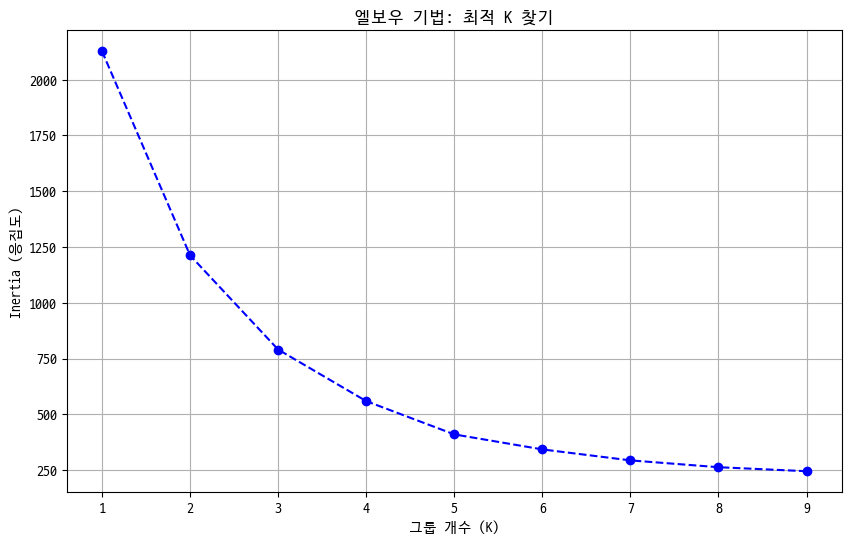

In [3]:
from sklearn.cluster import KMeans

inertia = []
k_range = range(1, 10)

print("🔍 최적의 그룹 수를 계산 중...")

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='blue')
plt.title('엘보우 기법: 최적 K 찾기')
plt.xlabel('그룹 개수 (K)')
plt.ylabel('Inertia (응집도)')
plt.grid(True)
plt.show()

## 🌸 3단계: '사계절' 찾기 (K=4 군집화)

우리의 주제가 **"서울 아파트의 사계절"**이었으니, K=4로 설정해서 시장을 4가지 날씨로 나눠봅시다.

In [5]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

df['Cluster'] = kmeans.fit_predict(X_scaled_df)

cluster_summary = df.groupby('Cluster')[features].mean()
print("📊 그룹별 평균 성적표:")
display(cluster_summary.sort_values('Seoul_General', ascending=False))

print("\n📅 그룹별 기간(주) 수:")
print(df['Cluster'].value_counts())


📊 그룹별 평균 성적표:


,Seoul_General,Age_0_5,Size_135_over
Cluster,,,
0,0.170690,0.212000,0.185310
2,0.035265,0.028075,0.029447
1,-0.138641,-0.164466,-0.153689
3,-0.736667,-0.576667,-0.457778



📅 그룹별 기간(주) 수:
Cluster
2    452
0    145
1    103
3      9
Name: count, dtype: int64


### 📊 성적표 해석 (AI의 판단)

1. **3번 그룹 (평균 -0.74%): 🥶 빙하기 (폭락장)**
* 가장 무서운 구간입니다. 단 **9주**밖에 없었지만, 평균 하락률이 어마어마합니다. (아마도 금융위기급 충격이 왔을 때겠죠?)


2. **1번 그룹 (평균 -0.14%): ❄️ 겨울 (하락장)**
* 뚜렷한 하락세입니다. 약 **103주(2년)** 정도 지속되었습니다. 최근 2022~2023년이 여기에 해당할 확률이 높습니다.


3. **2번 그룹 (평균 +0.03%): 🍂 가을/봄 (보합 안정기)**
* 가장 많은 **452주(약 8년)**를 차지합니다. 서울 시장은 대부분 "아주 조금씩 오르거나 조용한" 시기를 보냈다는 뜻입니다.


4. **0번 그룹 (평균 +0.17%): 🔥 여름 (불장/급등장)**
* 화끈하게 오르던 시기입니다. **145주(약 3년)** 동안 지속되었습니다. 2020~2021년 폭등장 예상합니다.



## 🎨 4단계: "서울 아파트의 역사" 색칠

자, 이제 이 4가지 계절을 그래프 위에 알록달록하게 입혀봅시다! 어느 시기가 **'빙하기(3번)'**였는지, 언제부터 **'겨울(1번)'**이 시작됐는지 눈으로 직접 확인해보세요.

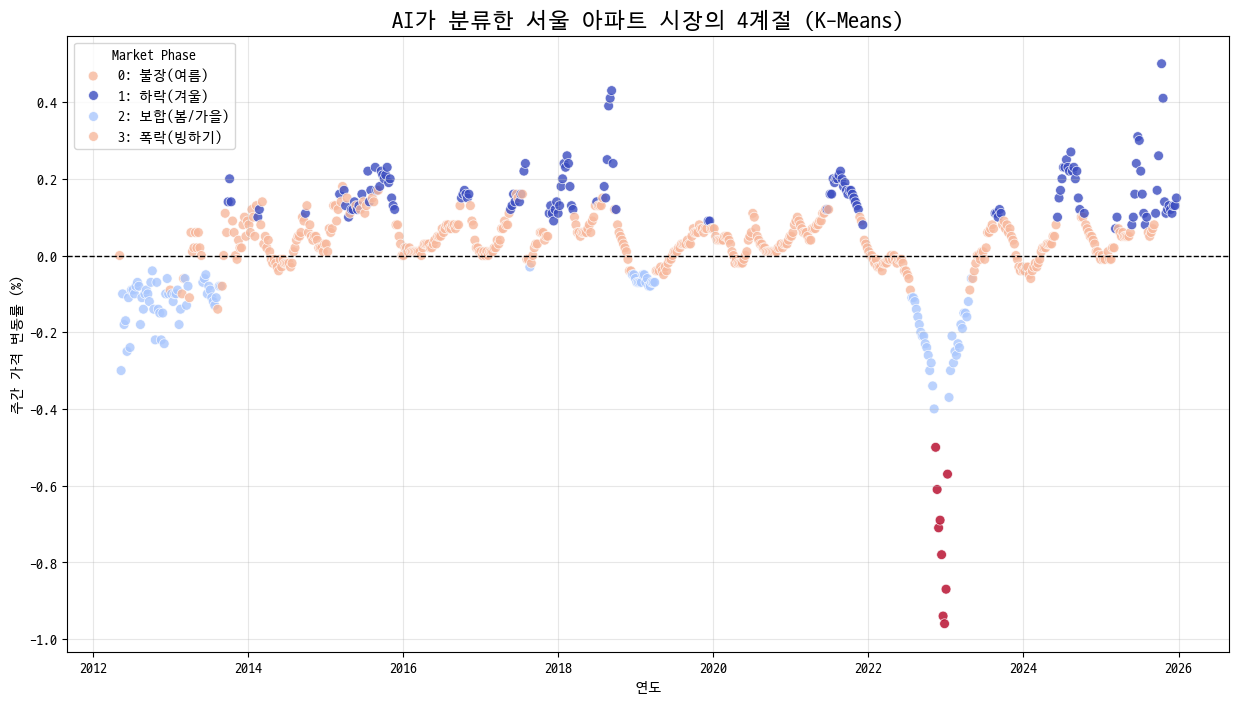

In [7]:
plt.figure(figsize=(15, 8))

sns.scatterplot(x='Date', y='Seoul_General', hue='Cluster', palette='coolwarm', data=df, s=50, alpha=0.8)

plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.title('AI가 분류한 서울 아파트 시장의 4계절 (K-Means)', fontsize=16)
plt.xlabel('연도')
plt.ylabel('주간 가격 변동률 (%)')
plt.legend(title='Market Phase', labels=['0: 불장(여름)', '1: 하락(겨울)', '2: 보합(봄/가을)', '3: 폭락(빙하기)'])
plt.grid(True, alpha=0.3)
plt.show()

### ❓ Q&A: 주간 변동률이 +0.4%인데 하락장(Cluster 1)으로 분류된 이유는?

**Q. "데이터를 보니 전체 가격 변동률(`Seoul_General`)이 +0.4%가 넘는 급등 구간인데도, AI는 이를 '불장(0번)'이 아닌 '하락/조정장(1번)'으로 분류했습니다. 오류 아닌가요?"**

**A. 오류가 아닙니다. 이는 '다변량 군집화(Multivariate Clustering)'의 특성 때문입니다.**

본 모델은 단순히 전체 가격(`Seoul_General`) 하나만 보고 판단하지 않고, **신축(`Age_0_5`)**과 **대형(`Size_135_over`)** 변동률을 함께 고려하여 시장의 성격을 규정했습니다.

1. **상승의 질(Quality) 분석:** 전체 지수는 상승했지만, 시장의 선행 지표 역할을 하는 **'신축'**이나 투자 심리를 대변하는 **'대형'** 아파트 가격이 하락하거나 보합세를 보인 경우입니다.
2. **AI의 해석:** AI는 이를 "모든 아파트가 골고루 오르는 진정한 상승장"이 아니라, **"일부 단지만 오르고 주도주는 힘이 빠진 가짜 상승(Fake Rise)"** 또는 **"하락 국면으로 전환되는 과도기"**로 판단했습니다.

실제로 해당 데이터를 상세 조회(`weird_days`)해 본 결과, 전체 지수는 높았으나 신축/대형 지수가 상대적으로 낮거나 마이너스를 기록한 패턴이 확인되었습니다. 이는 AI가 단편적인 수치보다 시장의 입체적인 맥락을 파악하고 있음을 시사합니다.

--> 다변량(변수 3개) 군집화를 했기 때문이다. 전체 지수는 올랐더라도, 투자 심리를 대변하는 '신축'이나 '대형' 지수가 꺾였다면 AI는 이를 하락 국면의 전조나 조정장으로 해석했다. 실제로 데이터를 확인한 결과, 해당 시기에는 신축/대형 지수가 전체 지수보다 낮았음."

In [11]:
# Q&A
weird_days = df[(df['Seoul_General'] > 0.1) & (df['Cluster'] != 0)]

if len(weird_days) > 0:
    print(f"총 {len(weird_days)}주 발견")
    display(weird_days[['Date', 'Seoul_General', 'Age_0_5', 'Size_135_over', 'Cluster']])
else:
    print("착시 가능성")

총 37주 발견


,Date,Seoul_General,Age_0_5,Size_135_over,Cluster
71,2013-09-16,0.11,0.05,0.05,2
89,2014-01-20,0.12,0.01,0.10,2
92,2014-02-10,0.13,0.04,0.01,2
96,2014-03-10,0.14,0.01,0.10,2
126,2014-10-06,0.13,0.04,0.07,2
144,2015-02-09,0.13,0.01,0.07,2
145,2015-02-16,0.13,0.00,0.10,2
147,2015-03-02,0.12,0.07,0.12,2
149,2015-03-16,0.14,0.02,0.11,2
150,2015-03-23,0.18,0.01,0.13,2


## 🌤️ [Final Report] 서울 아파트 시장의 '사계절' 분석 (Unsupervised Learning)

### 1. 프로젝트 개요

* **목표:** 정답(Label)이 없는 서울 아파트 시계열 데이터에서 **스스로 시장의 국면(Phase)을 분류**하는 AI 모델링
* **데이터:** 2012년~2025년 주간 아파트 가격 데이터 (전체 지수, 연령별 지수, 규모별 지수)
* **알고리즘:** **K-Means Clustering** (비지도 학습) + **Elbow Method** (최적 군집 수 탐색)

### 2. 분석 과정 (Methodology)

1. **데이터 스케일링 (Scaling):** 변동률(%) 데이터의 미세한 차이를 AI가 학습할 수 있도록 `StandardScaler`로 정규화.
2. **최적의 K 탐색:** 엘보우 기법(Elbow Method)을 통해 시장을 설명하는 최적의 군집 수가 **4개(K=4)**임을 수학적으로 도출.
3. **군집화 수행:** 서울 아파트 시장을 4가지 계절로 자동 분류.
* **Cluster 0 (불장/여름):** 강한 상승세, 모든 지표가 동반 상승.
* **Cluster 1 (하락/겨울):** 추세적 하락 구간.
* **Cluster 2 (보합/봄·가을):** 지루한 횡보 및 안정기 (가장 긴 기간 차지).
* **Cluster 3 (폭락/빙하기):** 금융위기급의 급격한 가격 조정 구간.



### 3. 핵심 인사이트 (Key Findings)

* **"가짜 상승"의 발견:**
* 전체 매매 지수(`Seoul_General`)가 **+0.4% 이상** 급등했음에도, AI가 이를 **'하락/조정장(Cluster 1)'**으로 분류한 사례를 발견함.
* **원인 분석:** 해당 시기에 시장 선행 지표인 **신축(`Age_0_5`)**과 투자 심리 지표인 **대형(`Size_135_over`)** 아파트 가격은 하락하거나 보합세를 보임.
* **결론:** AI는 단순한 수치적 상승이 아니라, **상승의 질(Quality)과 건전성**을 종합적으로 판단하여 인간이 놓치기 쉬운 **'추세 전환의 신호'**를 포착해 냄.



### 4. 총평

본 프로젝트를 통해 AI(비지도 학습)가 인간의 주관적 편견 없이 **데이터의 패턴만으로 시장의 성격을 객관적으로 진단**할 수 있음을 확인하였다. 이는 투자 의사결정 시 시장의 과열 여부나 진바닥(True Bottom)을 판단하는 보조 지표로 활용 가치가 높다.